# Heart Failure Prediction

**Problem Statement and Dataset provided by Kaggle.**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Load Data and Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Exploration

- The data consists of 299 observations and 13 characteristics. 
- There are no missing datapoints.

In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### About the Variables

#### Quantitative
**age:** patient age<br>
**creatinine_phosphokinase:** level of CPK enzyme in the blood (mcg/L)<br>
**ejection_fraction:** percentage of blood leaving the heart at each contraction<br>
**platelets:** platelets in the blood (kiloplatelets/mL)<br>
**serum_creatinine**: level of serum creatinine in the blood (mg/dL)<br>
**serum_sodium:** level of serum sodium in the blood (mEq/L)<br>
**time:** follow-up period (days)<br>

#### Categorical
**anaemia:** descrease of red blood cells or hemoglobin<br>
**dibates:** if the patient has diabetes<br>
**high_blood_pressure:** if the patient has hypertension<br>
**sex:** female or male (female=0, male=1)<br>
**smoking:** if the patient smokes or not<br>

#### Target
**DEATH_EVENT:** if the patient deceased during the follow-up period

### Variable Distributions

In [6]:
numerical_cat = df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

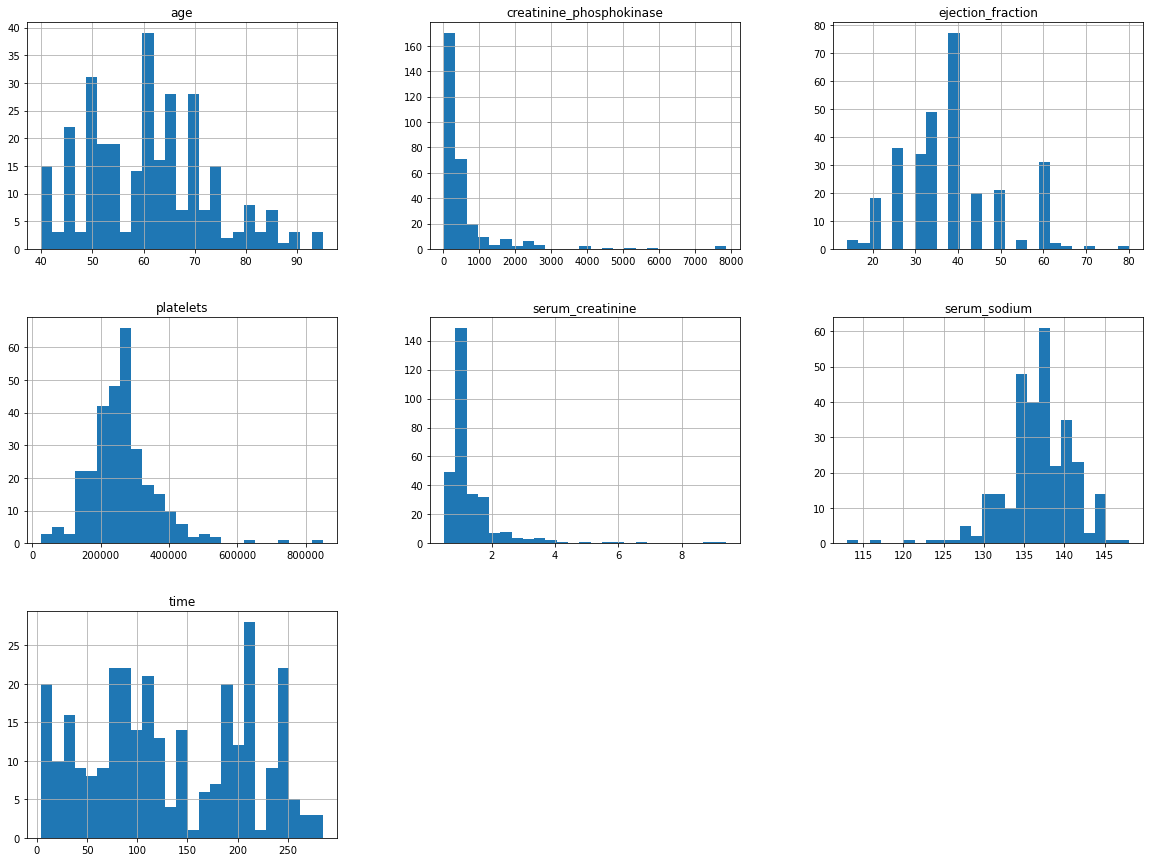

In [7]:
numerical_cat.hist(bins=25, figsize=(20,15))
plt.show()

#### age
- Patient ages range from 40-95, with most falling below age 75. 
- Non-surviving patients had a higher mean age than surviving patients.
- The average age for a death event is 65, while the average age of patients in the dataset is 61.

<AxesSubplot:xlabel='age', ylabel='Count'>

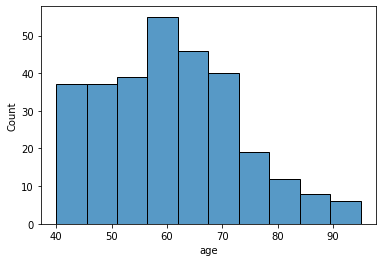

In [8]:
sns.histplot(data=df, x="age")

In [9]:
print("minimum age:", round(df.age.min()))
print("maximum age:", round(df.age.max()))

minimum age: 40
maximum age: 95


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

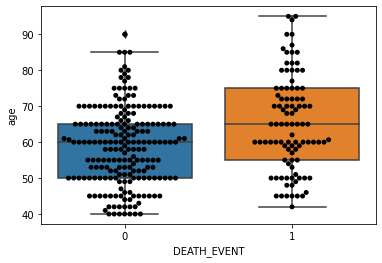

In [10]:
sns.boxplot(data=df, x="DEATH_EVENT", y="age")
sns.swarmplot(data=df, x="DEATH_EVENT", y="age", color="black")

In [11]:
print("mean age overall:", round(df.age.mean()))
print("mean age of death event:", round(df[df["DEATH_EVENT"] == 1].age.mean()))

mean age overall: 61
mean age of death event: 65


<AxesSubplot:xlabel='sex', ylabel='age'>

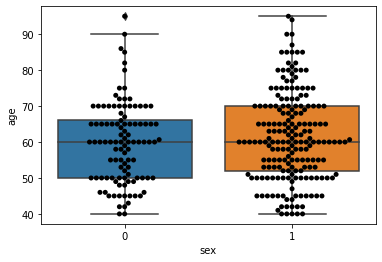

In [12]:
sns.boxplot(data=df, x="sex", y="age")
sns.swarmplot(data=df, x="sex", y="age", color="black")

#### Blood Levels
- **creatinine phosphokinase:** Non-surviving patients had a wider distribution of creatinine phosphokinase levels.
- **ejection fraction:** Non-surviving patients had a lower ejection fraction, on average.
- **platelets:** There are no major visual indications of differences in platelet levels between non-surviving and surviving patients. Surviving patients showed a slightly wider distribution of platelet levels.
- **serum creatinine:** Non-surviving patients had serum creatinine levels slightly higher than surviving patients, on average. Non-surviving patients exhibited a wider distribution of serum creatinine levels.
- **serum sodium:** There are no visual indications of differences in serum sodium levels between non-surviving and surviving patients.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

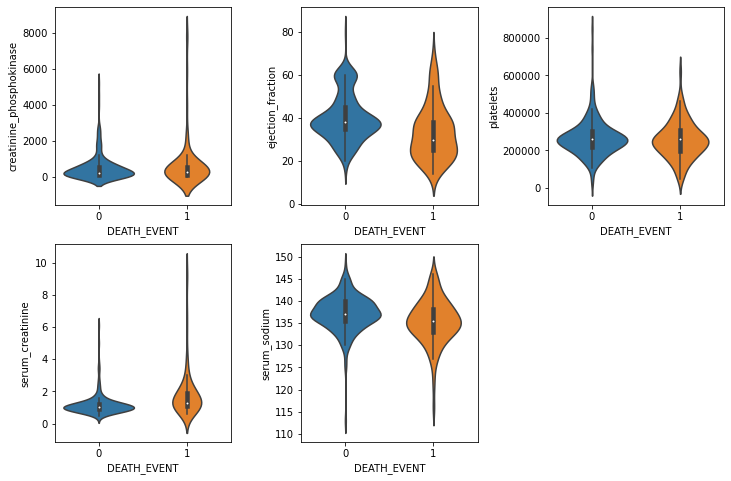

In [13]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,3,1)
sns.violinplot(data=df, x="DEATH_EVENT", y="creatinine_phosphokinase")

plt.subplot(2,3,2)
sns.violinplot(data=df, x="DEATH_EVENT", y="ejection_fraction")

plt.subplot(2,3,3)
sns.violinplot(data=df, x="DEATH_EVENT", y="platelets")

plt.subplot(2,3,4)
sns.violinplot(data=df, x="DEATH_EVENT", y="serum_creatinine")

plt.subplot(2,3,5)
sns.violinplot(data=df, x="DEATH_EVENT", y="serum_sodium")

#### time
The time variable indicates the time from the start of the study to the time the study was terminated, due to a loss of communication with the patient or death. For that reason, it is not considered a valid prediction feature.

In [14]:
df = df.drop("time", axis=1)

#### Conditions
The percentage of patients with the following conditions did not survive:
- **Anaemic Patients:** 35.7%
- **Diabetic Patients:** 32.0%
- **High Blood Pressure Patients:** 37.1%
- **Smoking Patients:** 31.2%

Text(0.5, 1.0, 'Smoking')

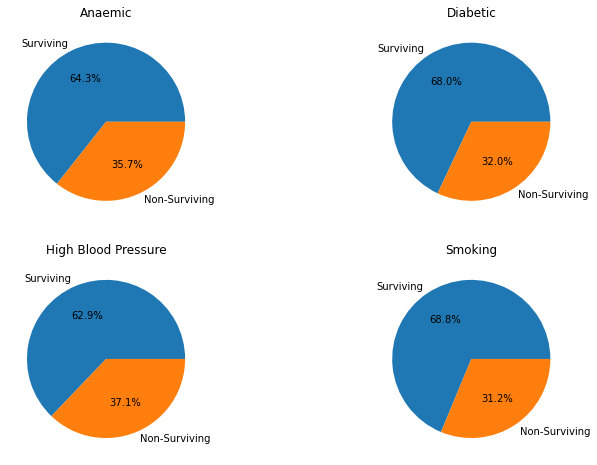

In [15]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.2)

plt.subplot(2,2,1)
plt.pie(df[df["anaemia"] == 1].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"],autopct='%1.1f%%')
plt.title("Anaemic")

plt.subplot(2,2,2)
plt.pie(df[df["diabetes"] == 1].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"], autopct='%1.1f%%')
plt.title("Diabetic")

plt.subplot(2,2,3)
plt.pie(df[df["high_blood_pressure"] == 1].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"], autopct='%1.1f%%')
plt.title("High Blood Pressure")

plt.subplot(2,2,4)
plt.pie(df[df["smoking"] == 1].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"], autopct='%1.1f%%')
plt.title("Smoking")

#### sex
- There are more male than female patients in the dataset (65% male, 35% female).
- Both male and female patients exhibited the same percentage of survival rates (68% survivial, 32% death).

Text(0.5, 1.0, 'Male and Female Patients')

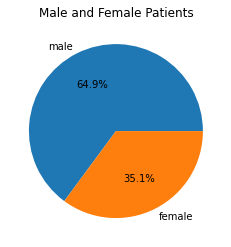

In [16]:
plt.pie(df.sex.value_counts(), labels = ["male", "female"], autopct='%1.1f%%')
plt.title("Male and Female Patients")

Text(0.5, 1.0, 'Female Patients')

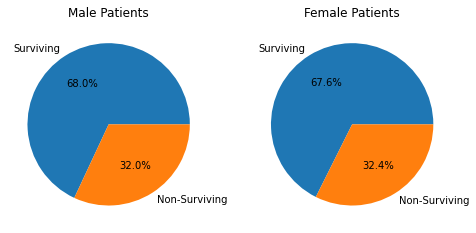

In [17]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(df[df["sex"] == 1].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"], autopct='%1.1f%%')
plt.title("Male Patients")

plt.subplot(1,2,2)
plt.pie(df[df["sex"] == 0].DEATH_EVENT.value_counts(), labels=["Surviving", "Non-Surviving"], autopct='%1.1f%%')
plt.title("Female Patients")

### Variable Relationships
- The heatmap indicates a high correlation between smoking and sex, which is further investigated by the countplot below. Almost all smoking patients in the dataset were male.
- Variables showing correlation to the target **DEATH_EVENT** include serum_sodium, serum_creatinine, ejection_fraction, and age.

<AxesSubplot:>

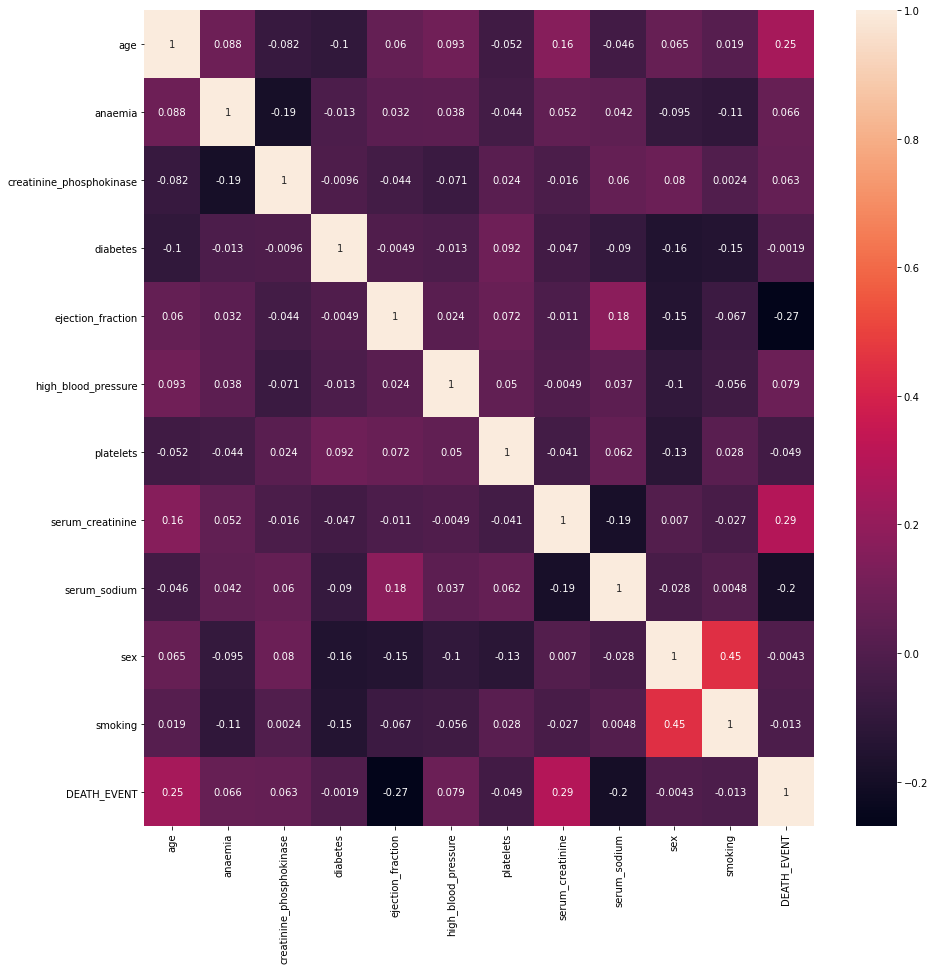

In [18]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='smoking', ylabel='count'>

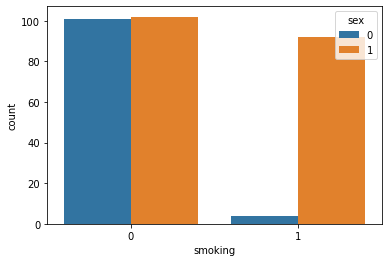

In [19]:
sns.countplot(data=df, x="smoking", hue="sex")

## Predictions
The following code utilizes supervised machine learning models to predict if a patient survives based on the following variables:
- Serum Sodium Level
- Serum Creatinine Level
- Ejection Fraction
- Age

In [20]:
features = df.drop("DEATH_EVENT", axis=1)
target = df["DEATH_EVENT"]

### Preprocessing
Non-binary data is scaled to ensure equal magnitudes during model fitting. 

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)

### Modeling and Scoring Function
The following function will be used to fit and score models using 5-Fold Cross Validation.

In [22]:
from sklearn import model_selection
from sklearn.metrics import (auc, roc_auc_score)

def model_fit_score(model, X, y):
    
    kfold = model_selection.KFold(n_splits=5)
    score = model_selection.cross_val_score(model, X, y, scoring="roc_auc", cv=kfold)
    print("AUC: "f"{score.mean():.3f} STD: {score.std():.2f}")

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
model_fit_score(lr, features, target)

AUC: 0.770 STD: 0.09


#### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
model_fit_score(tree, features, target)

AUC: 0.627 STD: 0.05


#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_fit_score(rf, features, target)

AUC: 0.781 STD: 0.07


#### XGBoost

In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, random_state=42)
model_fit_score(xgb, features, target)

AUC: 0.695 STD: 0.06


### Test Data

The model with the highest AUC was the random forest model using 100 estimators. 
 
How does the model perform when splitting the data into train and test? The data is split, allowing 80% for training and 20% for validation. 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=42)

In [30]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7166666666666667

## Conclusion
Serum Sodium Level, Serum Creatinine Level, Ejection Fraction, and Age of the patient can be used to predict if he/she will not survive due to heart failure with almost 72% accuracy using the random forest model.